In [3503]:
# 타이타닉 생존자 예측 하기 
# train 데이터로 학습한 뒤 test 데이터에 대한 생존율을 예측한다.

# 나의 목표 : 1차로 최대한 구글링 없이 해보기 / 2차 수정 시 자료들 참고하기 

# 240822 오늘의 목표
# 전처리


# 데이터 분석
    # 과제는 생존율을 구하는 문제이지만 추가로 도출해 볼 사항은 없는지 고민
    # 

#1. 데이터 읽기 
    # 데이터의 컬럼이나 데이터형식등을 파악
    
#2. 데이터 전처리 
    # 데이터 결측치 확인하기 
    # 컬럼 분리할 것은 없는지 확인(ex- 날짜)
    # 새롭게 조합하여 추가할 컬럼은 없는지 확인
    # 불필요한 데이터는 없는지
    # 범주형데이터 수치화하기
    # 변수 스케일링 
    
# 240823
    
#3. 데이터 시각화 
    # seaborn이나 plotly 라이브러리 사용해서 예쁘게 만들어 보기 
    

#4. 모델링 
    # 레퍼런스 없이 사용가능한 기본 모델 적용해본 후
    # 앙상블기법등 여러가지 모델 대입해보기 


#5. 평가

#6. 분석

In [3504]:
# 모델링
# 1. 로지스틱회귀
# 2. 랜덤포레스트 
# 3. svm 
# 4. 그리드서치와 앙상블 
# 5. 하드보팅
# 6. 부스팅

#### 0. 한글폰트 설치 및 라이브러리 호출

In [3505]:
# 0. 필요한 라이브러리 호출(+ 한글폰트 설치)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 설치 
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [3506]:
# 소수점 자리수 설정
pd.options.display.precision = 3

#### 데이터 불러오기

In [3507]:
# 데이터 불러오기 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3508]:
# 훈련 데이터 확인

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [3509]:
# 컬럼확인

train.columns

# #### train data 컬럼 확인하기 

# - passengerId : 승객 아이디
# - Survived : 생존여부 
# - Pclass : 객실등급(1,2,3)
# - Name : 승객 이름
# - Sex : 승객 성별
# - Age : 승객 나이
# - SibSp : 동승한 형제자매/배우자의 수 
# - Parch : 동승한 부모/자식의 수 
# - Ticket : 티켓번호
# - Fare : 지불한 요금
# - Cabin : 방 호수 
# - Embarked : 탑승지(S,C,Q)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3510]:
train.shape #891,12

(891, 12)

In [3511]:
train.info()

# 결측치가 존재하는 컬럼 : Age / Cabin / Embarked

# 특이사항
# age가 float임 
# cabin의 결측치가 너무 많다. 중요한 컬럼인지 고려해보기 제거할까?
# 승객의 이름과 티켓은 중요하지 않아보임
# 범주형데이터 : Embarked, Sex 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3512]:
train.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [3513]:
# 탑승지도 사실 생존자 예측에 별로 영향을 줄 것 같지 않음
# 선실 등급 별 생존자 확인하기 
# 성별 생존자 확인하기 
# 나이대별 생존자 확인하기 
# 같은 탑승지 같은 등급의 객실인데 티켓요금이 차이나는 이유가 뭘까.. 같은 3등급이어도 객실의 위치가 다른걸까 하지만 객실위치는 값이 없는 상황임



In [3514]:
# 테스트 데이터 살펴보기 

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287,NaN,S


In [3515]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [3516]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3517]:
test.shape  #418,11

(418, 11)

In [3518]:
test.info()

# 결측치가 존재하는 컬럼 : Age / Fare / Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 데이터 전처리

In [3519]:
# 데이터 전처리 

# 1. 결측치 
# age/cabin/embared 결측치 채우기 

# 2. 범주형 데이터 수치화하기 
# sex : lable encoding / embarked : one hot encoding

# 3. 컬럼 추가해보기 
# 나이를 범위를 정해서 나이대 컬럼을 넣어보자 

# 4. 컬럼 제거하기 
# 이름, 티켓번호, 요금, 승선지 

# 5. 모델링 전 변수 스케일링하기



# !!!!!! 테스트 데이터도 동일하게 전처리를 해줘야 한다 
# 모델 예측 시 훈련데이터와 컬럼이 일치해야 함 

#### 결측치확인

In [3520]:
train['Age'].isnull().sum()
# 나이는 177개의 결측치를 가진다

177

In [3521]:
#테스트데이터 나이 결측치확인
test['Age'].isnull().sum()

86

In [3522]:
# 나이 결측치에 어떤값을 추가해줄까 
# 평균, 중앙값
age_mean = train['Age'].mean()
age_median = train['Age'].median()
print(age_median)   #28세
print(age_mean)     #29.699세


# train['Age'].fillna(age_median)

28.0
29.69911764705882


In [3523]:
test_age_mean = test['Age'].mean()
test_age_mean

30.272590361445783

In [3524]:
train['Age'] = train['Age'].fillna(age_mean)

In [3525]:
test['Age'] = test['Age'].fillna(test_age_mean)

In [3526]:
# 나이 결측치를 채운 뒤 나이 결측치 확인해보기
train['Age'].isnull().sum() #결측치 제거됨

0

In [3527]:
test['Age'].isnull().sum()

0

In [3528]:
# cabin 결측치 추가 
# 삭제를 하는편이 나을것같음

In [3529]:
# embarked 결측치 채우기 
embarked_mode = train['Embarked'].mode()
print(embarked_mode)
# train['Embarked'] = train['Embarked'].fillna(embarked_mode)
# train['Embarked'].isnull().sum()    #embarked 값이 채워지지 않는다. 

# mode()는 시리즈를 반환하기 때문에 몇번째 컬럼으로 채울것인지 적어줘야 함

train['Embarked'] = train['Embarked'].fillna(embarked_mode[0])
train['Embarked'].isnull().sum() 

0    S
Name: Embarked, dtype: object


0

In [3530]:
test_embarked_mode = test['Embarked'].mode()
print(test_embarked_mode)

test['Embarked'] = test['Embarked'].fillna(test_embarked_mode[0])
test['Embarked'].isnull().sum() 

0    S
Name: Embarked, dtype: object


0

#### 범주형 데이터 인코딩

In [3531]:
# 2. 범주형 데이터 수치화하기 
# sex : lable encoding / embarked : one hot encoding


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encode = LabelEncoder()
encode.fit(train['Sex'])

LabelEncoder()

In [3532]:
test_encode = LabelEncoder()
test_encode.fit(test['Sex'])

LabelEncoder()

In [3533]:
labels = encode.transform(train['Sex'])
train['Sex'] = labels

In [3534]:
labels_test = encode.transform(test['Sex'])
print(labels_test)
test['Sex'] = labels_test


[1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1]


In [3535]:
encode.classes_
# female : 0
# male : 1 

array(['female', 'male'], dtype=object)

In [3536]:
# embarked : one hot encoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(train[['Embarked']])

OneHotEncoder()

In [3537]:
ohe_test = OneHotEncoder()
ohe_test.fit(test[['Embarked']])

OneHotEncoder()

#### 희소행렬

In [3538]:
# 원핫인코더는 여러개의 열을 한번에 처리할 수 있게 설계되어 있어서 단일 열을 학습할때도 2차원 배열형태를 제공해야한다.

sparse_matrix = ohe.transform(train[['Embarked']])

In [3539]:
sparse_matrix_test = ohe_test.transform(test[['Embarked']])

In [3540]:
sparse_matrix

# Compressed Sparse Row sparse matrix of dtype 'float64'
# with 891 stored elements and shape (891, 4)
# Compressed Sparse Row는 이러한 희소 행렬을 효율적으로 저장하는 방식 중 하나임
# 행(row) 단위로 0이 아닌 값들만 저장하고, 각 값이 어떤 열(column)에 위치하는지를 인덱스로 저장하는 구조

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 891 stored elements and shape (891, 3)>

In [3541]:
sparse_matrix_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 418 stored elements and shape (418, 3)>

#### 밀집배열

In [3542]:
# 원핫인코딩 결과값을(희소행렬) 밀집배열로 변환
# 밀집 배열(Dense Matrix)의 특징:
# 모든 요소 저장: 배열에 있는 모든 값이 저장됩니다. 특히 0이나 빈 값들도 포함
# 메모리 사용량: 밀집 배열은 모든 값을 저장하기 때문에 메모리 사용량이 상대적으로 많음
# 일반적인 배열 형태: 우리가 보통 생각하는 일반적인 2차원 배열, 행렬 등이 밀집 배열의 예

embarked_dense = sparse_matrix.toarray()
print(embarked_dense)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [3543]:
embarked_dense_test = sparse_matrix_test.toarray()
print(embarked_dense_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [3544]:
# embarked_dense.get_feature_names_out()   #불가
# #get_feature_names_out()는 원핫인코더 객체에서 사용할 수 있다.

embarked_ohe_columns = ohe.get_feature_names_out()
#array(['Embarked_C', 'Embarked_Q', 'Embarked_S'],
    #   dtype=object)

In [3545]:
embarked_ohe_test_columns = ohe_test.get_feature_names_out()

In [3546]:
# 다시 데이터 프레임으로 변환
embarked_columns = pd.DataFrame(embarked_dense, columns=embarked_ohe_columns)

In [3547]:
embarked_test_columns = pd.DataFrame(embarked_dense_test, columns=embarked_ohe_test_columns)

In [3548]:
# 기존의 훈련데이터와 결합
train = pd.concat([train,embarked_columns], axis = 1)

In [3549]:
test = pd.concat([test,embarked_test_columns], axis = 1)

In [3550]:
# 인코딩이 잘 되었는지 확인 

print(train.columns)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.283,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.100,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.050,NaN,S,0.0,0.0,1.0


In [3551]:
print(test.columns)
test.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.829,NaN,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.000,NaN,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.688,NaN,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.662,NaN,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.287,NaN,S,0.0,0.0,1.0


In [3552]:
# 변수스케일링 해보기 

# 1. fare(MinMaxScaler, StandardScaler)
# 2. age - age는 0-9로 분류했음


#### 컬럼 추가/제거

In [3553]:
# 3. 컬럼 추가해보기 
# 나이를 범위를 정해서 나이대 컬럼을 넣어보자 
# SibSp와 Parch를 합해서 가족 구성원이라는 새로운 컬럼 생성해도 됨 

# 4. 컬럼 제거하기 
# 이름, 티켓번호, 요금, 승선지 

In [3554]:
# 가족구성원 컬럼 추가하기 
train['Family'] = train['SibSp'] + train['Parch']

In [3555]:
test['Family'] = test['SibSp'] + test['Parch']

In [3645]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup
0,1,0,3,1,22,7.250,S,0.0,0.0,1.0,1,2
1,2,1,1,0,38,71.283,C,1.0,0.0,0.0,1,3
2,3,1,3,0,26,7.925,S,0.0,0.0,1.0,0,2
3,4,1,1,0,35,53.100,S,0.0,0.0,1.0,1,3
4,5,0,3,1,35,8.050,S,0.0,0.0,1.0,0,3


In [3644]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup
0,892,3,1,34,7.829,0.0,1.0,0.0,0,3
1,893,3,0,47,7.000,0.0,0.0,1.0,1,4
2,894,2,1,62,9.688,0.0,1.0,0.0,0,6
3,895,3,1,27,8.662,0.0,0.0,1.0,0,2
4,896,3,0,22,12.287,0.0,0.0,1.0,2,2


In [3558]:
# 컬럼 먼저 제거하기 

# 기존의 sex,embarked 컬럼 : 수치화하여 새로운 컬럼으로 추가함
# sex 컬럼은 라벨인코딩된 데이터로 덮어씌움 삭제 불필요
# name/ticket : 생존률을 예측하는데 불필요하다고 판단
# cabin : 결측치가 너무 많음 

train = train.drop(['Name','Ticket','Cabin','SibSp','Parch'], axis=1)
# train = train.drop(['Name','Ticket','Cabin'], axis=1)

In [3559]:
# 승객번호도 생존률에 영향을 주지 않을 것 같음
# train = train.drop(['PassengerId'], axis=1)

# 테스트 데이터에는 passengerId가 있어야 제출이 가능하므로 지울수없다 

In [3560]:
test = test.drop(['Name','Ticket','Cabin','SibSp','Parch'], axis=1)
# test = test.drop(['Name','Ticket','Cabin'], axis=1)

In [3561]:
# 나이 소수점을 제거해볼까 아니면 정수형으로 변환? 

train['Age'] = train['Age'].astype(int)

In [3562]:
test['Age'] = test['Age'].astype(int)

In [3563]:
train.info()

# !!!왜 원핫인코딩한 embarked의 데이터들이 전부 float 타입인가!! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Embarked_C   891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Family       891 non-null    int64  
dtypes: float64(4), int32(2), int64(4), object(1)
memory usage: 69.7+ KB


In [3564]:
# 생존자 데이터프레임

survived = train[train['Survived'] == 1] 


In [3565]:
survived_df = survived.reset_index()
survived_df

# 생존자 341명

,index,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family
0,1,2,1,1,0,38,71.283,C,1.0,0.0,0.0,1
1,2,3,1,3,0,26,7.925,S,0.0,0.0,1.0,0
2,3,4,1,1,0,35,53.100,S,0.0,0.0,1.0,1
3,8,9,1,3,0,27,11.133,S,0.0,0.0,1.0,2
4,9,10,1,2,0,14,30.071,C,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
337,875,876,1,3,0,15,7.225,C,1.0,0.0,0.0,0
338,879,880,1,1,0,56,83.158,C,1.0,0.0,0.0,1
339,880,881,1,2,0,25,26.000,S,0.0,0.0,1.0,1
340,887,888,1,1,0,19,30.000,S,0.0,0.0,1.0,0


In [3566]:
# survived_df[['Survived','Age']].groupby(survived_df['Pclass']).mean()

#객실등급별 생존자의 합과 나이의 평균을 각각의 함수로 구하고 싶음 

train.groupby(train['Pclass']).agg({
    'Survived' : 'sum',
    'Age' : 'mean'
})


# 생존자의 합은 1값만 모두 더하여 정확하게 확인가능하지만
# 나이의 평균은 생존자인 경우만 골라서 구할수 없었음

,Survived,Age
Pclass,,
1,136,36.944
2,87,29.804
3,119,26.191


In [3567]:
# 생존자의 총합과 생존자의 연령 평균을 구하기 위해 미리 필터링해둔 생존자 데이터프레임을 활용함

survived_df.groupby(survived_df['Pclass']).agg({
    'Survived' : 'sum',
    'Age' : 'mean'
})

,Survived,Age
Pclass,,
1,136,34.706
2,87,26.011
3,119,23.017


In [3568]:
train[['Pclass','Survived','Sex']].groupby(['Pclass']).sum()

,Survived,Sex
Pclass,,
1,136,122
2,87,108
3,119,347


In [3569]:
survived_df[['Pclass','Survived','Sex']].groupby(survived_df['Pclass']).sum()

,Pclass,Survived,Sex
Pclass,,,
1,136,136,45
2,174,87,17
3,357,119,47


In [3570]:
# 위 코드에서는 성별 별로 생존자를 보기 어려웠음 
# 피봇테이블로 여성 남성을 분리함
# values 열에서 1인 값들만 합산됨 

pivot = train.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='sum')
print(pivot)

Sex      0   1
Pclass        
1       91  45
2       70  17
3       72  47


In [3571]:
pivot = survived_df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='sum')
print(pivot)

Sex      0   1
Pclass        
1       91  45
2       70  17
3       72  47


In [3572]:
train[['Sex','Survived']].groupby(['Sex']).sum()
# 여성 233 
# 남성 109 

,Survived
Sex,
0,233
1,109


#### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_19196\695687088.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x = 'Sex', y = 'Survived', data = train,  palette = ['#94BFA7', '#FFC49B'], ci = None)
C:\Users\user\AppData\Local\Temp\ipykernel_19196\695687088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x = 'Sex', y = 'Survived', data = train,  palette = ['#94BFA7', '#FFC49B'], ci = None)


Text(0, 0.5, 'Survival Rate')

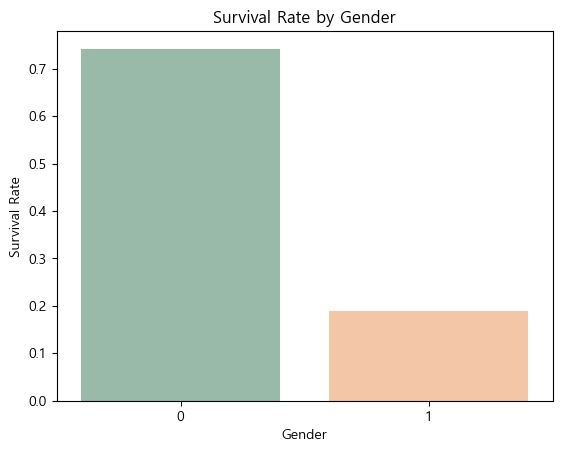

In [3573]:
# 성별에 따른 생존률 seaborn으로 확인하기

barplot = sns.barplot(x = 'Sex', y = 'Survived', data = train,  palette = ['#94BFA7', '#FFC49B'], ci = None)
# 파라미터 ci 알아보기(신뢰구간)
barplot.set_title('Survival Rate by Gender')
barplot.set_xlabel('Gender')
barplot.set_ylabel('Survival Rate')

<Axes: xlabel='count', ylabel='Age'>

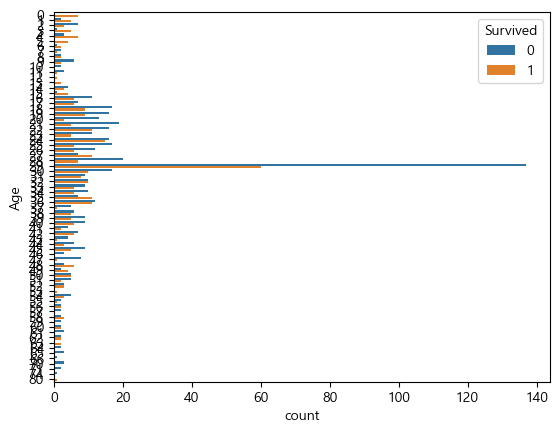

In [3574]:
sns.countplot(data=train, y = 'Age', hue='Survived')

#age의 범주가 너무 많음
# hue='Survived'는 Survived 열의 값을 기준으로 데이터를 그룹화하고, 각 그룹을 다른 색상으로 표시하도록 지시


24.0
61.0
268.0
94.0
55.0
28.0
13.0
6.0
38.0
41.0
129.0
73.0
34.0
20.0
6.0
1.0
0
0


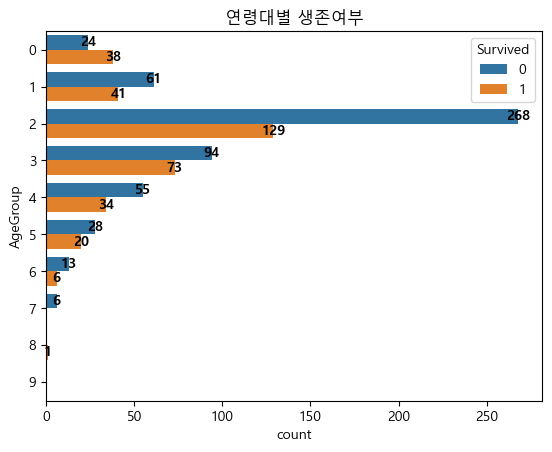

In [3575]:
# 나이를 구간별로 나누기
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # 구간 정의
labels = [0,1,2,3,4,5,6,7,8,9]  # 라벨 정의

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right = False) #right - 기본값은 오른쪽 경계포함 
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels,right = False)

agegroup_sns = sns.countplot(data=train, y = 'AgeGroup', hue='Survived')

for p in agegroup_sns.patches:      #patches : 각각의 막대들
    width = p.get_width()  # 바의 넓이(수치)
    print(width)
    if int(width) > 0:  # 값이 0보다 클 때만 텍스트 표시
        plt.text(width,   # 수치가 바 옆에 위치하도록 약간 옆으로 위치 조정
                p.get_y()+ p.get_height() / 2,  # 수치가 바의 중앙에 위치하도록 조정
                int(width),  # 수치 출력
                ha='center', va='center', fontweight='bold')

plt.title('연령대별 생존여부')
plt.show()

In [3576]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup
0,1,0,3,1,22,7.250,S,0.0,0.0,1.0,1,2
1,2,1,1,0,38,71.283,C,1.0,0.0,0.0,1,3
2,3,1,3,0,26,7.925,S,0.0,0.0,1.0,0,2
3,4,1,1,0,35,53.100,S,0.0,0.0,1.0,1,3
4,5,0,3,1,35,8.050,S,0.0,0.0,1.0,0,3


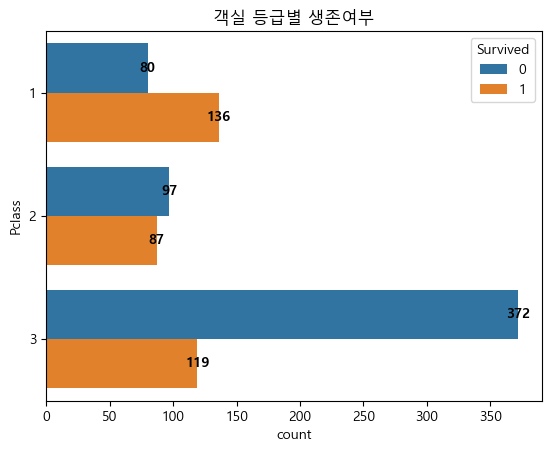

In [3577]:
Pclass_sns = sns.countplot(data=train, y = 'Pclass', hue = 'Survived')

for p in Pclass_sns.patches:
    width = p.get_width()  # 바의 넓이
    if int(width) > 0:  # 값이 0보다 클 때만 텍스트 표시
        plt.text(width + 0.05,   # 수치가 바 옆에 위치하도록 약간 옆으로 위치 조정
                p.get_y() + p.get_height() / 2,  # 수치가 바의 중앙에 위치하도록 조정
                int(width),  # 수치 출력
                ha='center', va='center', fontweight='bold')

plt.title('객실 등급별 생존여부')
plt.show()

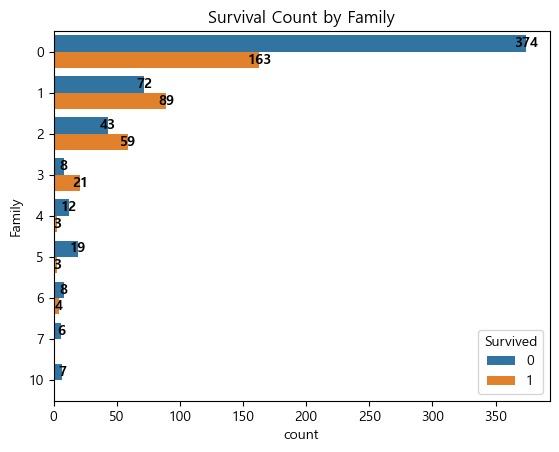

In [3578]:
Sibsp_sns = sns.countplot(data=train, y ='Family', hue = 'Survived')
for p in Sibsp_sns.patches:
    width = p.get_width()  # 바의 넓이
    if int(width) > 0:  # 값이 0보다 클 때만 텍스트 표시
        plt.text(width + 0.05,   # 수치가 바 옆에 위치하도록 약간 옆으로 위치 조정
                p.get_y() + p.get_height() / 2,  # 수치가 바의 중앙에 위치하도록 조정
                int(width),  # 수치 출력
                ha='center', va='center', fontweight='bold')

plt.title('Survival Count by Family')
plt.show()

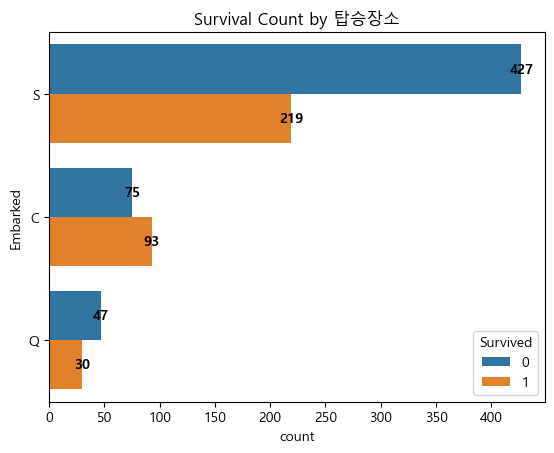

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64


Embarked
C    0.554
Q    0.390
S    0.339
dtype: float64

In [3579]:
# 탑승장소별 생존자 확인

place_sns = sns.countplot(data=train, y = 'Embarked', hue = 'Survived')
for p in place_sns.patches:
    width = p.get_width()  # 바의 넓이
    if int(width) > 0:  # 값이 0보다 클 때만 텍스트 표시
        plt.text(width + 0.05,   # 수치가 바 옆에 위치하도록 약간 옆으로 위치 조정
                p.get_y() + p.get_height() / 2,  # 수치가 바의 중앙에 위치하도록 조정
                int(width),  # 수치 출력
                ha='center', va='center', fontweight='bold')

plt.title('Survival Count by 탑승장소')
plt.show()


# 탑승지별 탑승자수를 확인하고 생존확률로 확인해보기
survived_count = train.groupby('Embarked')['Survived'].sum()
total_counts = train['Embarked'].value_counts()

print(survived_count)
survived_rate = survived_count / total_counts
survived_rate

Text(0.5, 1.0, '탑승지 별 생존확률')

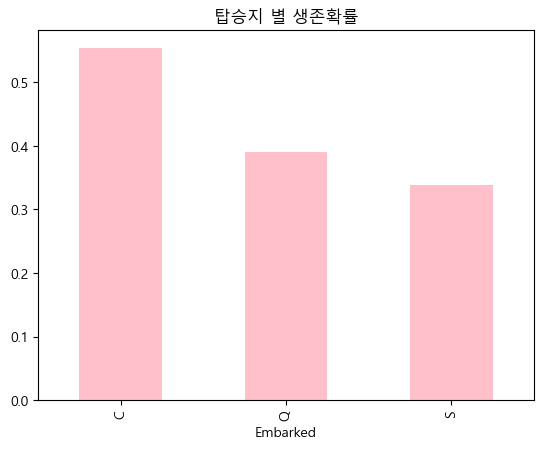

In [3580]:
survived_rate_graph=survived_rate.plot(kind = 'bar', color = 'pink')
for p in survived_rate_graph.patches:
    height = p.get_height()  # 바의 넓이
    if int(width) > 0:  # 값이 0보다 클 때만 텍스트 표시
        survived_rate_graph.text(width + 0.05,   # 수치가 바 옆에 위치하도록 약간 옆으로 위치 조정
                p.get_x() + p.get_width() / 2,  # 수치가 바의 중앙에 위치하도록 조정
                int(height),  # 수치 출력
                ha='center', va='center', fontweight='bold')
plt.title('탑승지 별 생존확률')

In [3581]:
# 탑승지별 객실등급 확인하기 

pclass_embarked_count = train.groupby('Embarked')['Pclass'].value_counts(normalize=True)
pclass_embarked_rate = pclass_embarked_count * 100
pclass_embarked_rate

Embarked  Pclass
C         1         50.595
          3         39.286
          2         10.119
Q         3         93.506
          2          3.896
          1          2.597
S         3         54.644
          2         25.387
          1         19.969
Name: proportion, dtype: float64

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


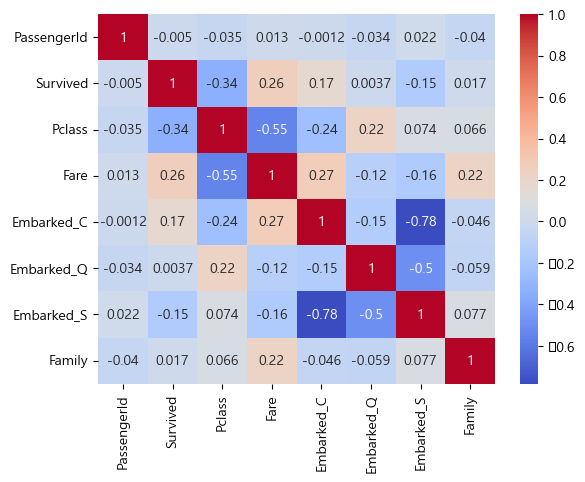

In [3582]:
# 숫자형 데이터만 선택
numeric_data = train.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

# pclass와 fare가 상관관계가 있어보임 

In [3583]:
# # fare 스케일링

# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # scaler = StandardScaler()
# # train[['Fare']] = scaler.fit_transform(train[['Fare']])
# # test[['Fare']] = scaler.transform(test[['Fare']])

# minmax = MinMaxScaler()
# train[['Fare']] = minmax.fit_transform(train[['Fare']])
# test[['Fare']] = minmax.transform(test[['Fare']])

In [3584]:
# 모델링

# 훈련데이터를 검증데이터와 훈련데이터로 나눠보기 
# survived 컬럼을 y변수로 지정하기 
# x 데이터에서 survived 변수 삭제해서 분리하기 
# 모델훈련 - 로지스틱회귀/랜덤포레스트/svm 등


In [3585]:
# 훈련데이터와 검증데이터 분리

from sklearn.model_selection import train_test_split
y = train['Survived']
train_x, valid_x, train_y, valid_y = train_test_split(train.drop(['Survived','Embarked'], axis = 1), y, test_size=0.2, random_state=42)

In [3586]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int32   
 4   Age          891 non-null    int32   
 5   Fare         891 non-null    float64 
 6   Embarked     891 non-null    object  
 7   Embarked_C   891 non-null    float64 
 8   Embarked_Q   891 non-null    float64 
 9   Embarked_S   891 non-null    float64 
 10  Family       891 non-null    int64   
 11  AgeGroup     891 non-null    category
dtypes: category(1), float64(4), int32(2), int64(4), object(1)
memory usage: 71.0+ KB


In [3587]:
# 모델링 - 로지스틱회귀

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)    #최대반복횟수 늘려도 정확도 달라지지 않음
logistic.fit(train_x, train_y)
valid_y_pred = logistic.predict(valid_x)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3588]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(valid_y,valid_y_pred)
accuracy_score  #80

0.8100558659217877

In [3589]:
# kfold로 교차검증해보기 

from sklearn.model_selection import cross_val_score

k_fold_score = cross_val_score(logistic,valid_x,valid_y,cv = 10)    #cv로 폴드 수 조절
# array([0.88888889, 0.61111111, 1.        , 0.94444444, 0.66666667,
#        0.83333333, 0.83333333, 0.72222222, 0.83333333, 0.82352941])
# 기본 5폴드 했을때 
# array([0.77777778, 0.97222222, 0.75      , 0.80555556, 0.82857143])
k_fold_score

#교차검증 평균점수 구해보기
k_fold_score.mean() #81

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

0.8212418300653596

In [3590]:
test.info() #test 데이터는 fare에도 한개의 결측치가 존재했음 
fare_nan = test[test['Fare'].isnull()]
fare_nan        # 해당 행의 pclass가 3인것 확인

# 3클래스의 평균 fare를 구해서 결측치를 채운다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int32   
 3   Age          418 non-null    int32   
 4   Fare         417 non-null    float64 
 5   Embarked     418 non-null    object  
 6   Embarked_C   418 non-null    float64 
 7   Embarked_Q   418 non-null    float64 
 8   Embarked_S   418 non-null    float64 
 9   Family       418 non-null    int64   
 10  AgeGroup     418 non-null    category
dtypes: category(1), float64(4), int32(2), int64(3), object(1)
memory usage: 30.3+ KB


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup
152,1044,3,1,60,NaN,S,0.0,0.0,1.0,0,6


In [3591]:
# 결측치에 3등석의 평균 요금을 추가하기 위해 
# 3등석 평균요금을 구해서 결측치를 채운다

pclass3_mean_fare = test[test['Pclass'] == 3]['Fare'].mean()
test['Fare'] = test['Fare'].fillna(pclass3_mean_fare)

In [3592]:
test['Fare'].isnull().sum()

0

In [3593]:
# 위에서 embarked를 사용해서 
test = test.drop('Embarked',axis = 1)

In [3594]:
# 로지스틱 회귀 예측
pred_y = logistic.predict(test)
pred_y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [3595]:
submission_logistic = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred_y
})

In [3596]:
submission_logistic.to_csv('submission_logistic.csv',index=False)
#0.75119

In [3597]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

In [3598]:
rfc = RandomForestClassifier(max_features='sqrt')
# rfc = RandomForestClassifier(min_samples_split=10)

rfc.fit(train_x,train_y)

RandomForestClassifier()

In [3599]:
print(rfc.score(train_x, train_y))  #과대적합
print(rfc.score(valid_x, valid_y))

# 1.0
# 0.8491620111731844

#depth=10
# 0.952247191011236
# 0.8268156424581006

#min_samples_split=10
# 0.9073033707865169
# 0.8212290502793296

1.0
0.8435754189944135


In [3600]:
rfc_valid_pred = rfc.predict(valid_x)

In [3601]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(valid_y,rfc_valid_pred)
accuracy_score  #0.849

0.8435754189944135

In [3602]:
rfc_pred_y = rfc.predict(test)

In [3603]:
print(f"Length of valid_y: {len(valid_y)}")
print(f"Length of rfc_pred_y: {len(rfc_pred_y)}")

Length of valid_y: 179
Length of rfc_pred_y: 418


In [3604]:
# from sklearn.metrics import accuracy_score

# accuracy_rfc_valid = accuracy_score(valid_y, rfc_pred_y)

In [3605]:
accuracy_rfc_valid

0.8212290502793296

In [3606]:
submission_rfc = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': rfc_pred_y
})

In [3607]:
submission_rfc.to_csv('submission_rfc.csv',index=False)
# 0.78468

In [3608]:
# 랜덤포레스트 하이퍼파라미터 튜닝

# from sklearn.model_selection import GridSearchCV

# rfr = RandomForestClassifier(random_state = 42, n_jobs = -1)
# params = { 'n_estimators' : [400, 500, 600, 700],
#            'max_depth' : [8, 9, 10, 11, 12, 13]
        
#             }
# grid_rfr = GridSearchCV(rfr, param_grid=params, cv=3, refit=True)
# grid_rfr.fit(train_x, train_y)


# # GridSearchCV 결과를 추출해 데이터 프레임으로 반환
# scores_df = pd.DataFrame(grid_rfr.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [3609]:
# 랜덤포레스트 하이퍼파라미터 튜닝 2

# from sklearn.model_selection import GridSearchCV

# rfr2 = RandomForestClassifier(random_state = 42, n_jobs = -1)
# params = { 'n_estimators' : [100,200,300,400],
#            'max_depth' : [5,6,7,8]
        
#             }
# grid_rfr2 = GridSearchCV(rfr2, param_grid=params, cv=3, refit=True)
# grid_rfr2.fit(train_x, train_y)


# # GridSearchCV 결과를 추출해 데이터 프레임으로 반환
# scores_df = pd.DataFrame(grid_rfr2.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [3610]:
# grid search로 찾아낸 best param으로 다시 모델 생성
best_rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=8, n_estimators=400)

In [3611]:
# grid search2로 찾아낸 best param으로 다시 모델 생성
best_rfc2 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators=100)

In [3612]:
best_rfc.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [3613]:
print(best_rfc.score(train_x, train_y))
print(best_rfc.score(valid_x, valid_y))

0.9241573033707865
0.8212290502793296


In [3614]:
best_rfc2.fit(train_x, train_y)

RandomForestClassifier(max_depth=6, n_jobs=-1, random_state=42)

In [3615]:
print(best_rfc2.score(train_x, train_y))
print(best_rfc2.score(valid_x, valid_y))

0.8848314606741573
0.8100558659217877


In [3616]:
best_rfc_pred = best_rfc.predict(test)
best_rfc_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3617]:
best_rfc_pred2 = best_rfc2.predict(test)
best_rfc_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3618]:
submission_best_rfc = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': best_rfc_pred
})
submission_best_rfc.to_csv('submission_best_rfc.csv',index=False)
# 0.77272

In [3619]:
submission_best_rfc2 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': best_rfc_pred2
})
submission_best_rfc2.to_csv('submission_best_rfc2.csv',index=False)
# 0.76315

In [3620]:
# 그레이디언트 부스팅 

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(train_x, train_y)
gbc_valid_pred = gbc.predict(valid_x)
gbc_valid_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [3621]:
# # 정규화나 표준화를 해서 적용하면 정확도가 달라질까?
# from sklearn.preprocessing import StandardScaler

# stdScaler = StandardScaler()

# stdScaler.fit(train_x)
# train_x_scaled = stdScaler.transform(train_x)

# valid_x_scaled = stdScaler.transform(valid_x)

In [3622]:
# gbc.fit(train_x_scaled,train_y)

In [3623]:
# valid_pred_scale = gbc.predict(valid_x_scaled)
# valid_pred_scale

In [3624]:
gbc_valid_pred = gbc.predict(valid_x)
gbc_valid_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [3625]:
# print(gbc.score(train_x_scaled, train_y))
# print(gbc.score(valid_x_scaled, valid_y))

# 0.9087078651685393
# 0.8268156424581006

In [3626]:
print(gbc.score(train_x, train_y))
print(gbc.score(valid_x, valid_y))

0.9115168539325843
0.8100558659217877


In [3627]:
print(f"train_x 크기: {train_x.shape}")
print(f"train_y 크기: {train_y.shape}")
print(f"valid_x 크기: {valid_x.shape}")
print(f"valid_y 크기: {valid_y.shape}")

train_x 크기: (712, 10)
train_y 크기: (712,)
valid_x 크기: (179, 10)
valid_y 크기: (179,)


In [3628]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(valid_y,gbc_valid_pred)
accuracy_score  #0.826

0.8100558659217877

In [3629]:
# kfold로 교차검증해보기 

# from sklearn.model_selection import cross_val_score

# k_fold_score = cross_val_score(gbc,valid_x,valid_y,cv = 10)    #cv로 폴드 수 조절

# k_fold_score

# #교차검증 평균점수 구해보기
# k_fold_score.mean() #75

In [3630]:
gbc_pred = gbc.predict(test)
gbc_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3631]:
submission_gbc = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': gbc_pred
})
submission_gbc.to_csv('submission_gbc.csv',index=False)
#0.8110

In [3632]:
from sklearn.ensemble import GradientBoostingClassifier

# gbc_2 = GradientBoostingClassifier(random_state=123, learning_rate=0.01, n_estimators=1000)
gbc_2 = GradientBoostingClassifier(random_state=123, subsample=0.8,max_features='sqrt')

gbc_2.fit(train_x, train_y)
gbc_pred2 = gbc_2.predict(test)

gbc_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3633]:
print(gbc_2.score(train_x, train_y))
print(gbc_2.score(valid_x, valid_y))

0.8946629213483146
0.8156424581005587


In [3634]:
submission_gbc2 = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': gbc_pred2
})
submission_gbc2.to_csv('submission_gbc2.csv',index=False)

In [3635]:
# # 그레이디언트 하이퍼파라미터 튜닝_그리드서치

# from sklearn.model_selection import GridSearchCV

# gbm_tune = GradientBoostingClassifier(random_state = 42)
# params = { 'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
#            'learning_rate' : [0.01,0.1,0.5,0.001],
#            'max_depth' : [3,4,5,6,7,8,9,10]
        
#             }
# grid_gbm_tune = GridSearchCV(gbm_tune, param_grid=params, cv=3, refit=True)
# grid_gbm_tune.fit(train_x, train_y)


# # GridSearchCV 결과를 추출해 데이터 프레임으로 반환
# scores_df = pd.DataFrame(grid_gbm_tune.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [3636]:
# scores_df[scores_df['rank_test_score'] == 1]

In [3637]:
# 가장 적합한 하이퍼 파라미터를 얻는 함수 
# grid_gbm_tune.best_params_

In [3638]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_3 = GradientBoostingClassifier(random_state=123, learning_rate=0.001, max_depth=3, n_estimators=1000)
gbc_3.fit(train_x, train_y)
gbc_valid_pred_3 = gbc_3.predict(valid_x)
gbc_valid_pred_3

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [3639]:
print(gbc_3.score(train_x, train_y))
print(gbc_3.score(valid_x, valid_y))

0.8356741573033708
0.7988826815642458


In [3640]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier



In [3641]:
# SVM

from sklearn.svm import SVC

svm = SVC(random_state=123)
svm.fit(train_x, train_y)
svm_pred = svm.predict(test)


In [3642]:
print(svm.score(train_x, train_y))
print(svm.score(valid_x, valid_y))

0.651685393258427
0.5977653631284916


In [3643]:
# 240824 해볼것 

#1. 나이범주 바꿔보기 
#2. 요금도 
#3. 하드보팅